# Basic model

Some text explaining the basic model here.

In [8]:
%matplotlib inline
from brian2 import *
import ipywidgets as ipw
from numpy.random import poisson
import warnings
warnings.filterwarnings("ignore")

prefs.codegen.target = 'numpy'
defaultclock.dt = 0.05*ms

## Diffusion approximation

Some text explaining diffusion approximation here.

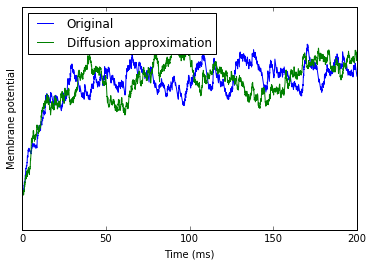

In [9]:
def diffusion_panel(num_inputs=10, tau_ms=10, rate_Hz=100, duration_ms=200):
    tau = tau_ms*ms
    rate = rate_Hz*Hz
    duration = duration_ms*ms
    weight = 1.0
    mu = weight*rate*num_inputs*tau
    sigma = weight*sqrt(rate*num_inputs*tau)
    nsteps = int(ceil(duration/defaultclock.dt))
    I = TimedArray(weight*poisson(num_inputs*rate*defaultclock.dt, size=nsteps)*tau/defaultclock.dt,
                   dt=defaultclock.dt)
    eqs = '''
    dv/dt = -v/tau : 1
    dw/dt = (mu-w)/tau+sigma*xi*tau**-0.5 : 1
    du/dt = (I(t)-u)/tau : 1
    '''
    P = PoissonGroup(num_inputs, rate)
    G = NeuronGroup(1, eqs, method='euler')
    S = Synapses(P, G, 'dummy:1', on_pre='v += weight')
    S.connect()
    M = StateMonitor(G, ['v', 'w', 'u'], record=True)
    Network(P, G, S, M).run(duration)
    plot(M.t/ms, M.v[0], label="Original")
    plot(M.t/ms, M.w[0], label="Diffusion approximation")
    yticks([])
    xlabel('Time (ms)')
    ylabel('Membrane potential')
    legend(loc='upper left')
    
ipw.interact(diffusion_panel,
             num_inputs=ipw.IntSlider(min=1, max=50, step=1, value=10,
                                      continuous_update=False,
                                      description="Num inputs $N$"),
             tau_ms=ipw.FloatSlider(min=0.1, max=20.0, step=0.1, value=10.0,
                                    continuous_update=False,
                                    description=r"Membrane time constant $\tau$ (ms)"),
             rate_Hz=ipw.FloatSlider(min=10, max=500, step=10, value=100.0,
                                     continuous_update=False,
                                     description=r"Input firing rate $\rho$ (sp/s)"),
             duration_ms=ipw.FloatSlider(min=50, max=500, step=50, value=200,
                                         continuous_update=False,
                                         description=r"Duration (ms)"),
             );